In [1]:
import os

import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpyro
from jax import random
from luxglm.inference import run_svi
from luxglm.utils import get_input_data
from visualization import (
    plot_coefficients,
    plot_experimental_parameters,
    plot_methylation_levels,
)

numpyro.enable_x64()
os.environ["XLA_FLAGS"] = "--xla_force_host_platform_device_count=4"

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

## One-step estimation


### Read input data


In [2]:
luxglm_input_data = get_input_data("metadata.tsv")

### Approximate posterior distributions using SVI


In [3]:
key = random.PRNGKey(0)

key, key_ = random.split(key)
lux_result_svi = run_svi(
    key,
    luxglm_input_data,
    ["basal/tgf-beta", "vitc", "ra"],
    num_steps=5_000,
    num_samples=1_000,
)

100%|██████████| 5000/5000 [02:15<00:00, 37.00it/s, init loss: 6743908.4753, avg. loss [4751-5000]: 27780.3008]


Text(0, 0.5, 'Loss')

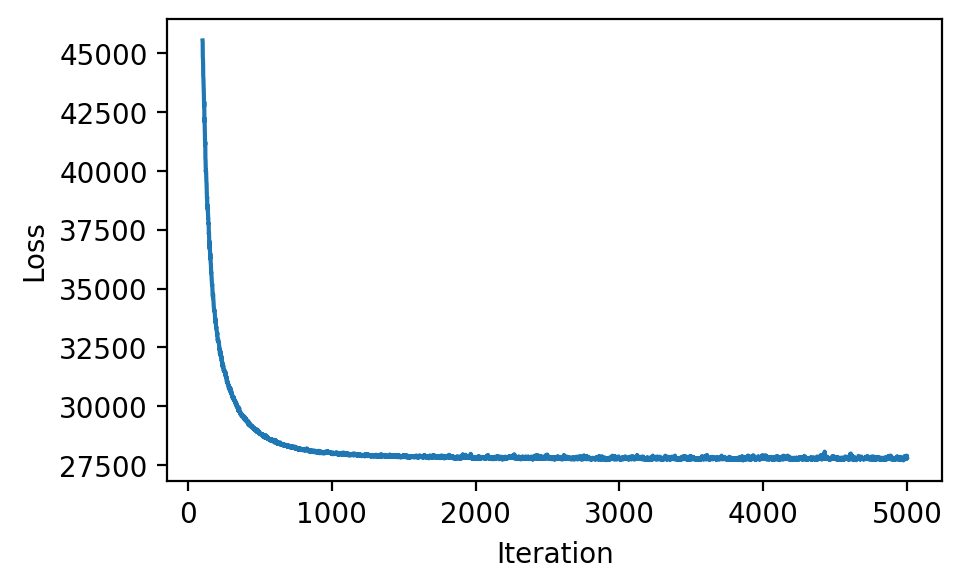

In [4]:
fig = plt.figure()

fig.set_size_inches(5, 3)

ax = fig.add_subplot(1, 1, 1)

skip = 100

ax.plot(
    jnp.arange(skip + 1, lux_result_svi.inference_metrics["losses"].shape[0] + 1),
    lux_result_svi.inference_metrics["losses"][skip:],
)

ax.set_xlabel("Iteration")
ax.set_ylabel("Loss")

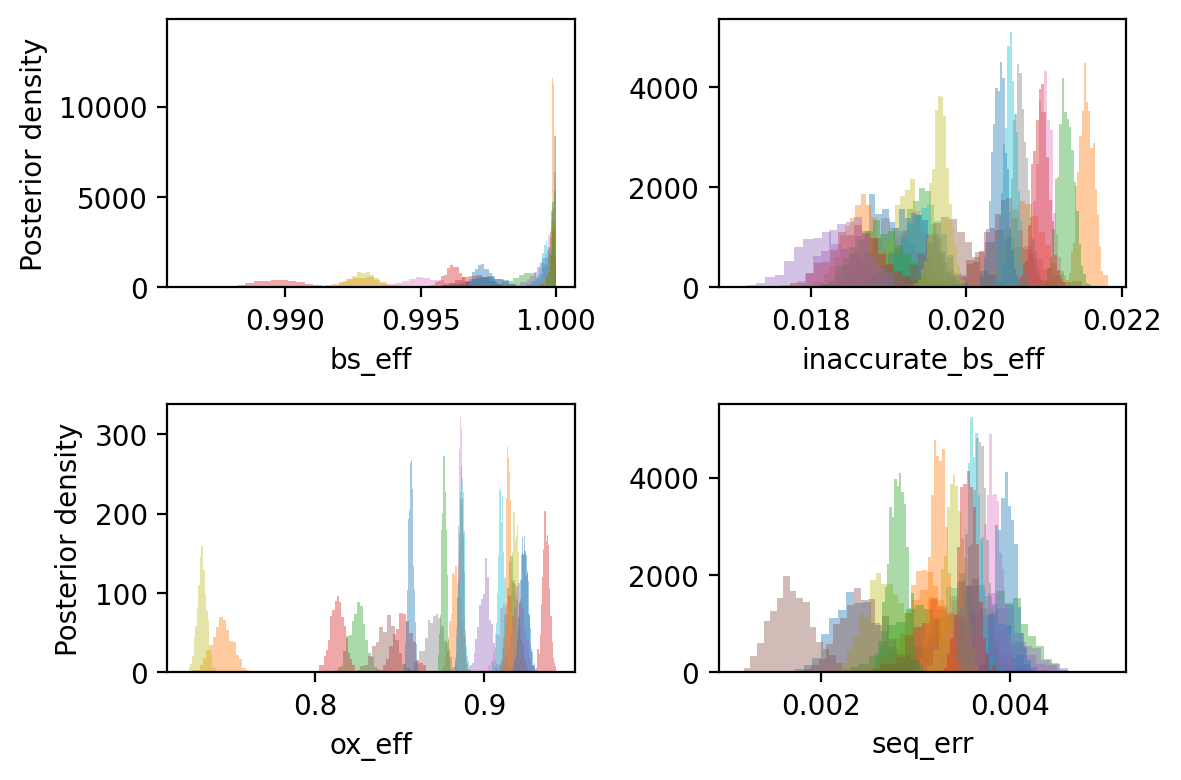

In [5]:
plot_experimental_parameters(lux_result_svi);

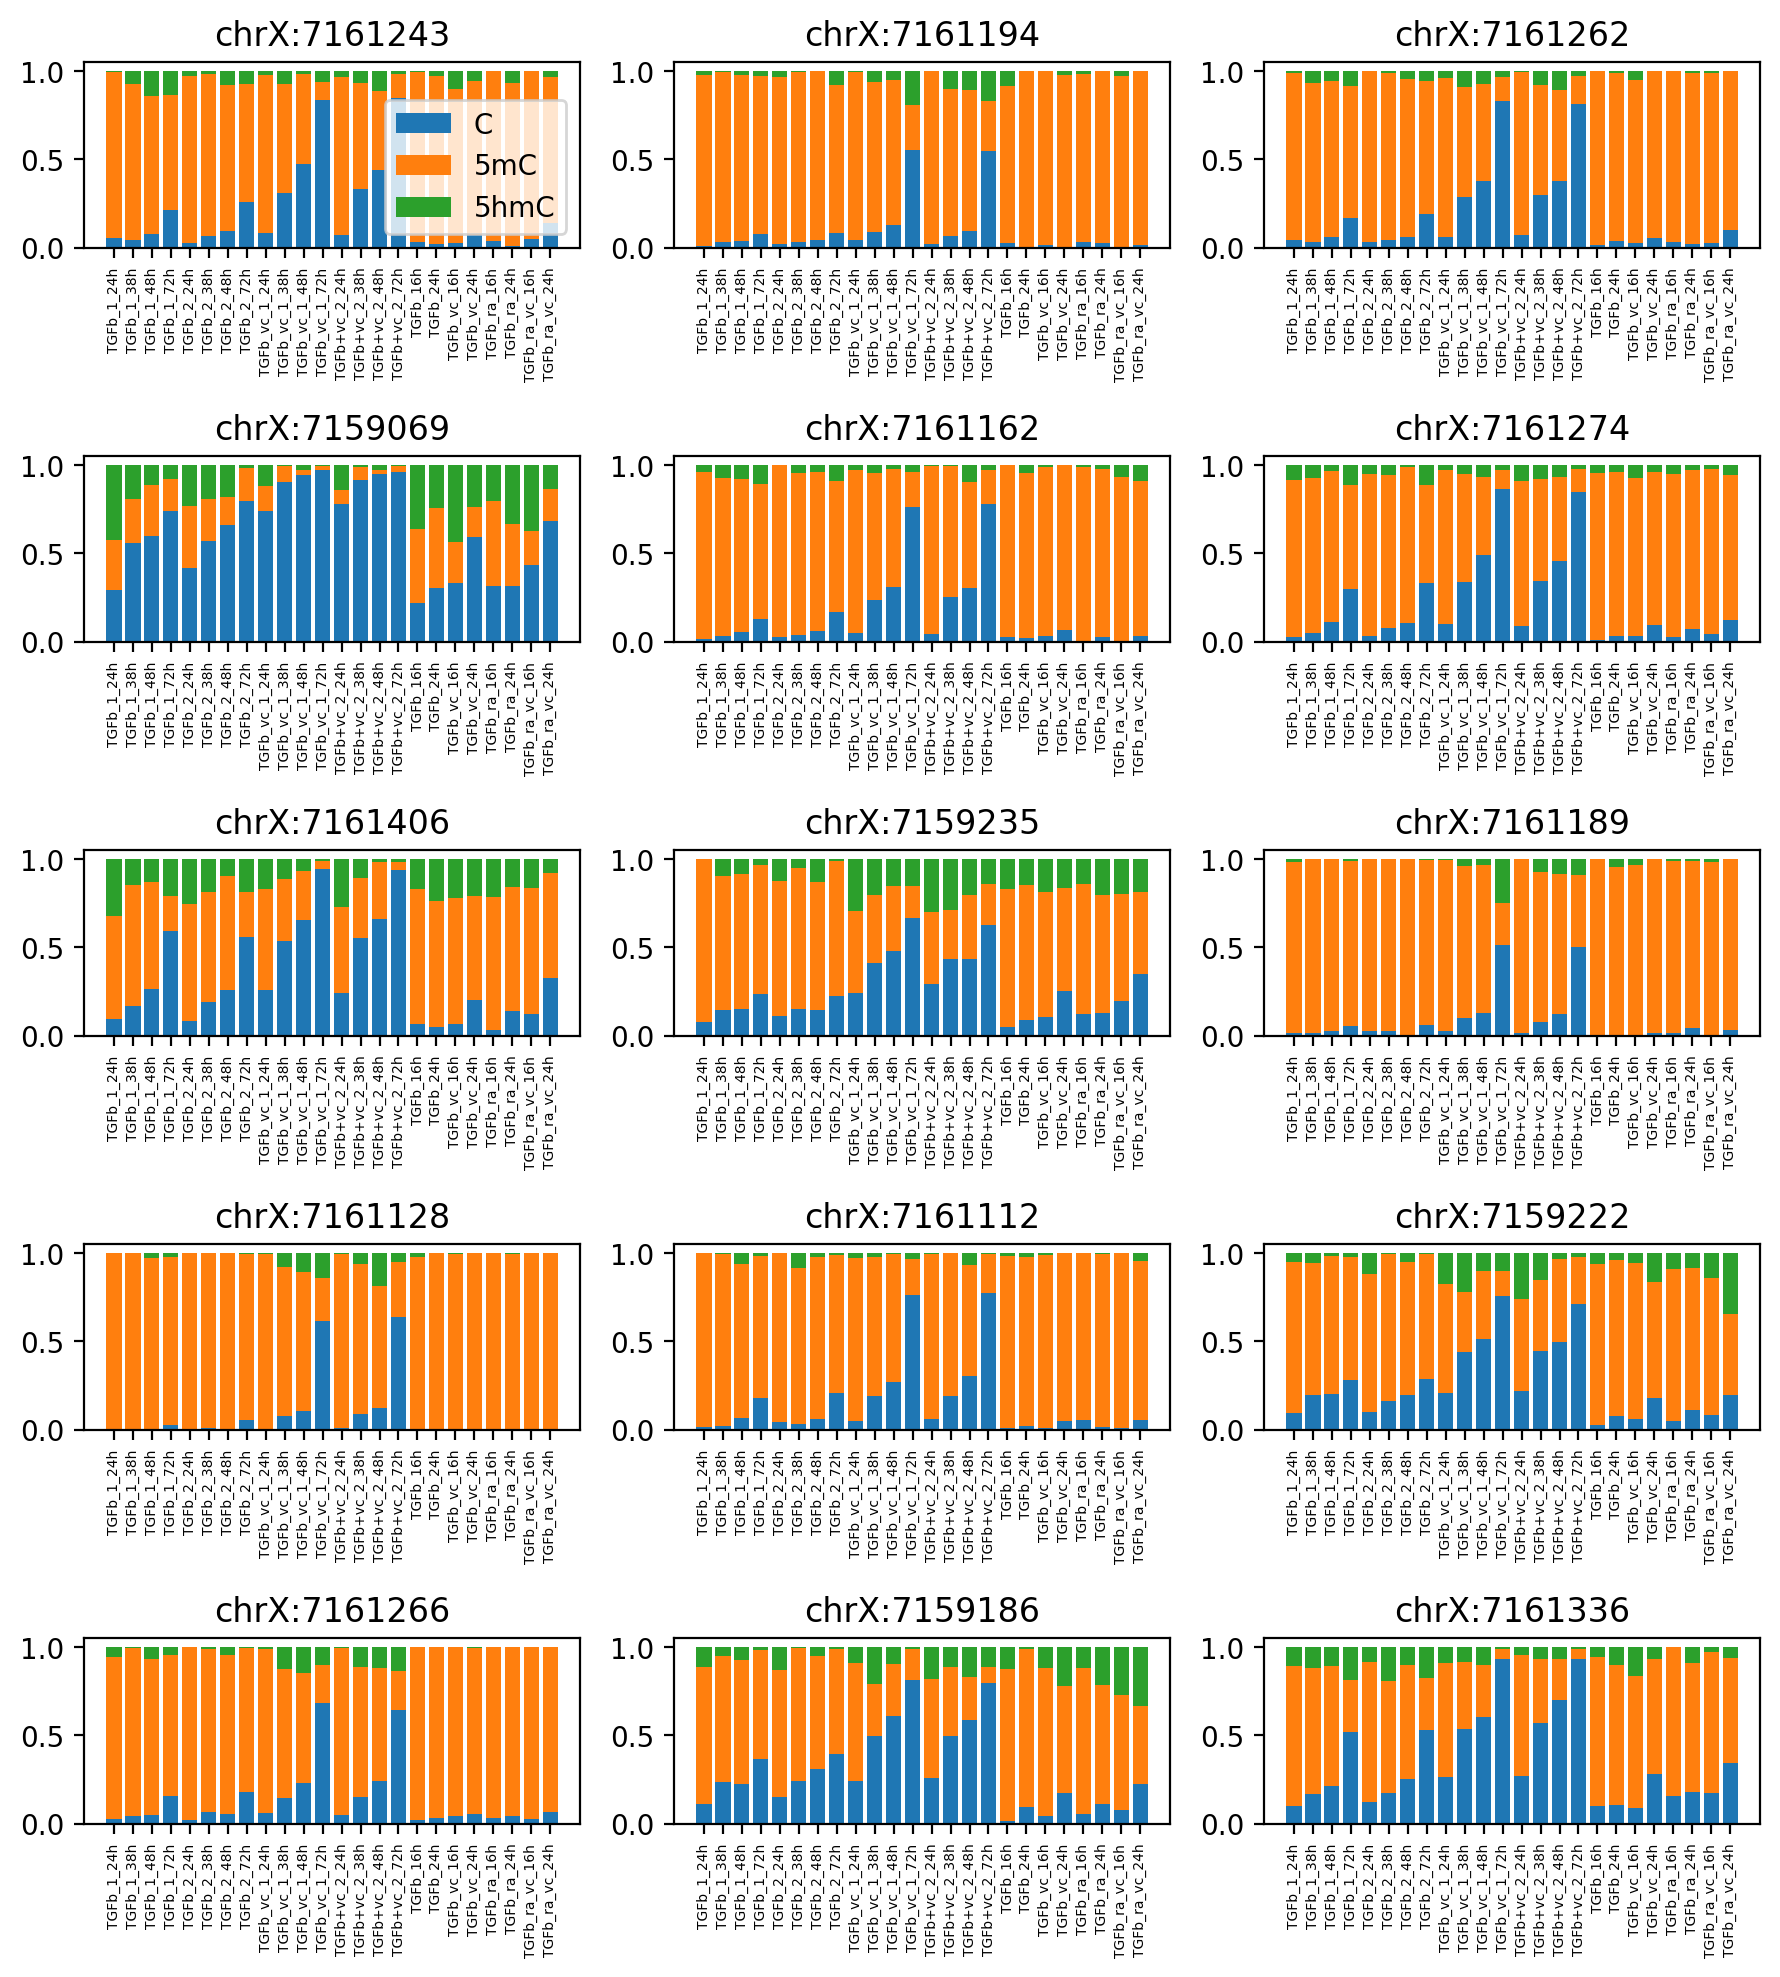

In [6]:
plot_methylation_levels(lux_result_svi);

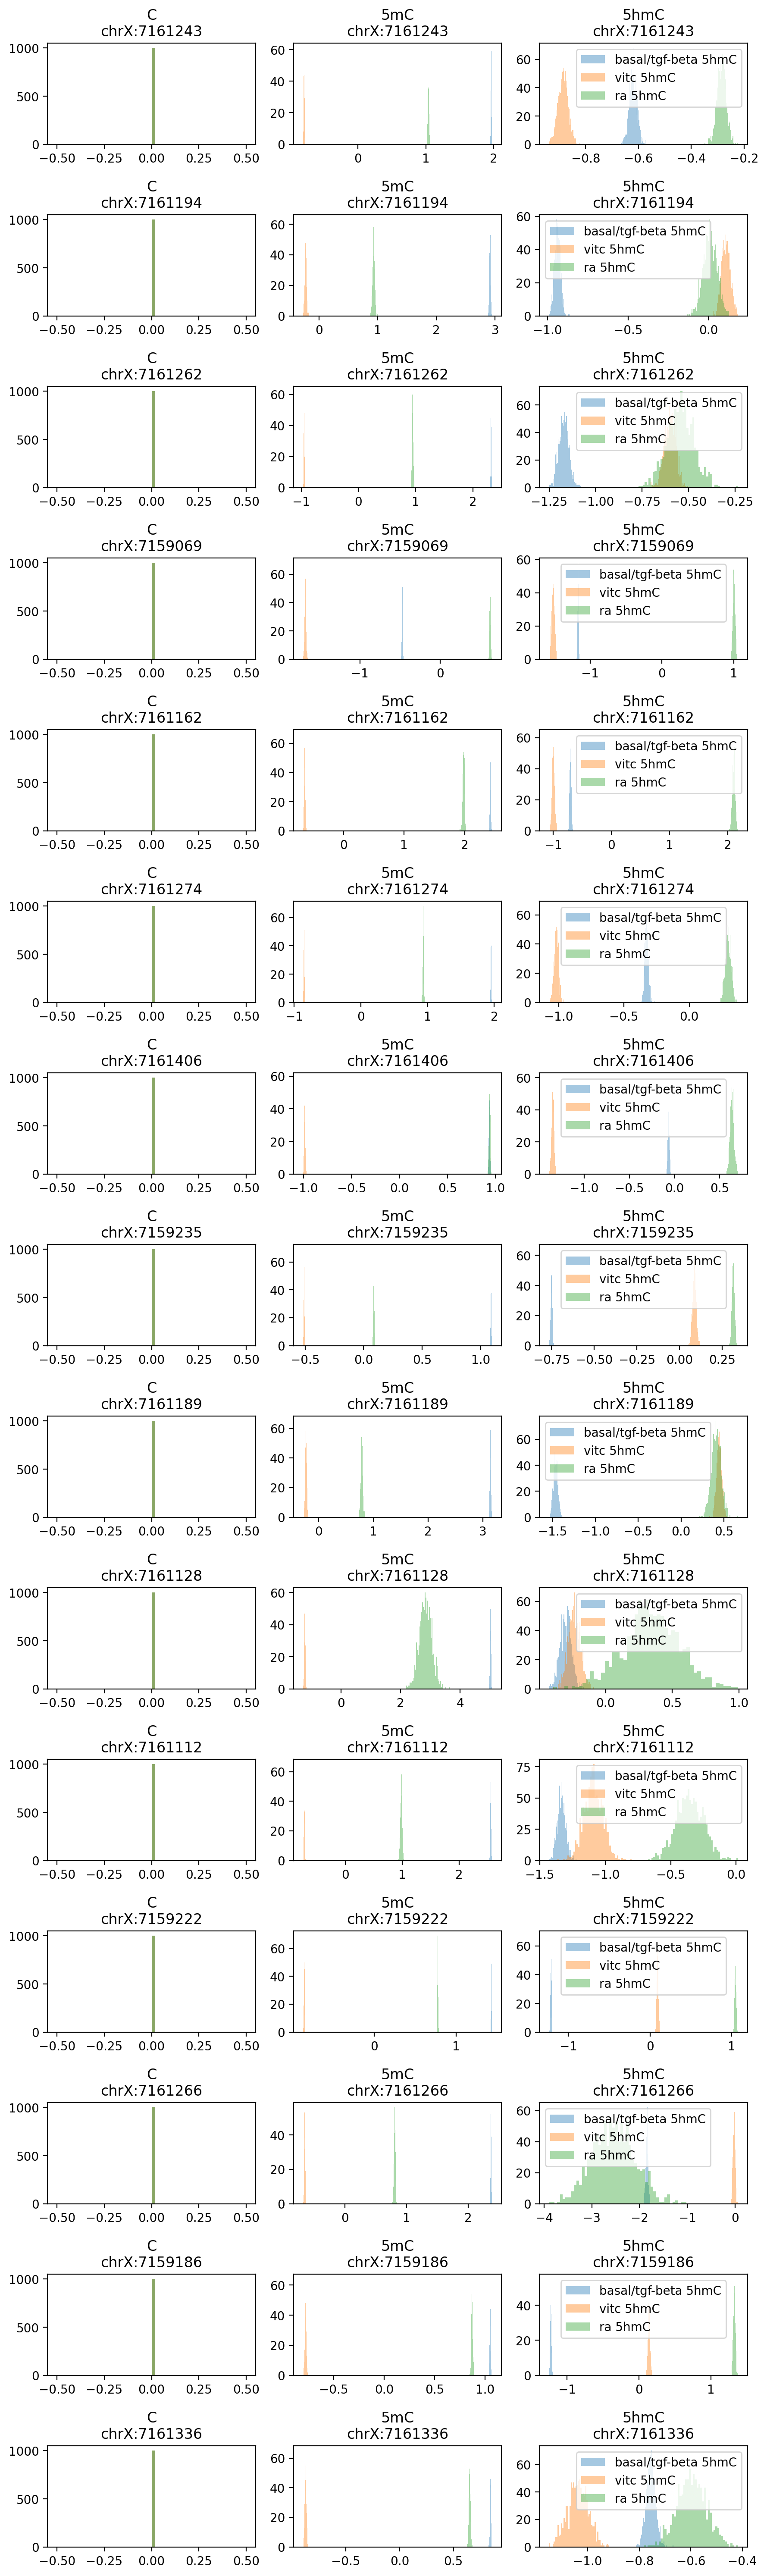

In [7]:
plot_coefficients(lux_result_svi);